## Exploring features
This notebook is intended for exploring features of the dataset (images and metadata).

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
import sys
sys.path.append("../")

### Load global constants

In [2]:
# Available categories in the dataset
dataset = ['COVID','NORMAL','Viral Pneumonia','Lung_Opacity']

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/COVID-19_Radiography_Dataset/'
preprocessed_data_dir = '../data/preprocessed/'

In [ ]:
from src.visualization.visualize import plot_images
from src.features.build_features import *
from src.preprocessing.image_preprocessor import *

### Using a sample image

In [4]:
image_path = raw_data_dir+'/COVID/images/COVID-3411.png'
mask_path = raw_data_dir+'/COVID/masks/COVID-3411.png'

image = apply_image_mask(mask_path,image_path,'body')

## Find edges for a selected image

### Using Canny

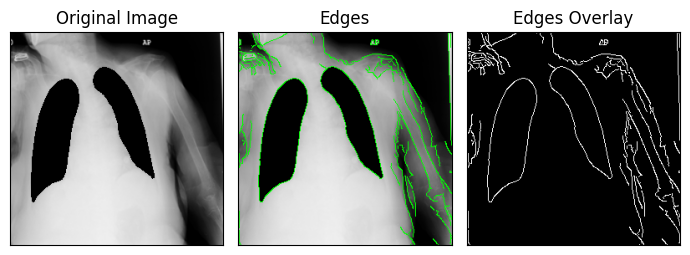

In [5]:
canny = get_edges(image)
plot_images(canny,['Original Image','Edges','Edges Overlay'])

### Using Harris

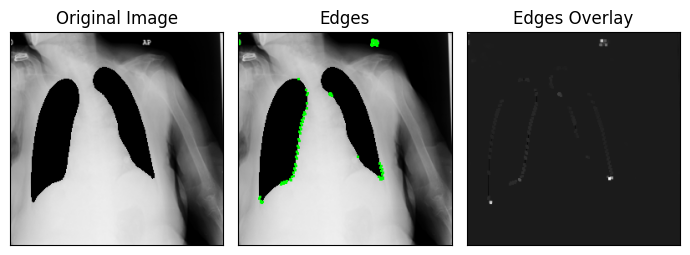

In [6]:
harris = get_edges(image, method='Harris')
plot_images(harris,['Original Image','Edges','Edges Overlay'])

### Using Gaussian

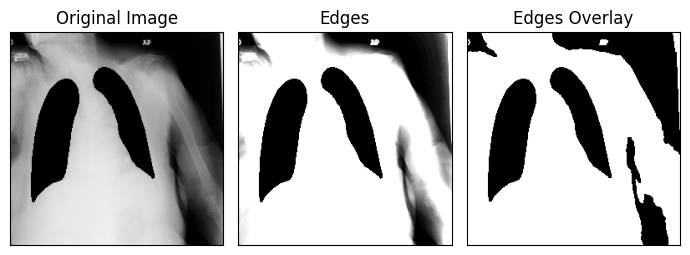

In [7]:
gaussian = get_edges(image, method='Gaussian')
plot_images(gaussian,['Original Image','Edges','Edges Overlay'])

### Get image histogram

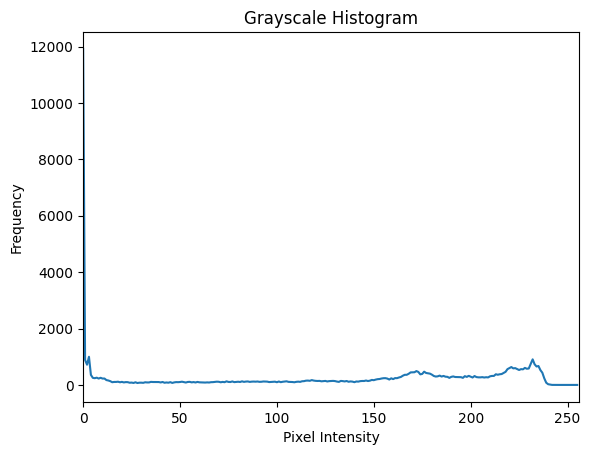

In [8]:
from src.visualization.visualizer import draw_image_histogram
draw_image_histogram(image)

### Using HOG (Histogram of Oriented Gradients) 

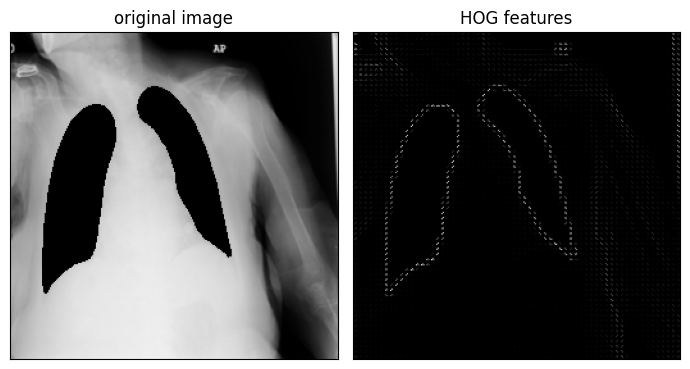

HOG features shape: (142884,)


In [9]:
features,hog_image = get_hog_features(image)
plot_images([image,hog_image], ['original image','HOG features'])
print("HOG features shape:", features.shape)

## Find features for a selected image

### Using Good Feautures Detector method

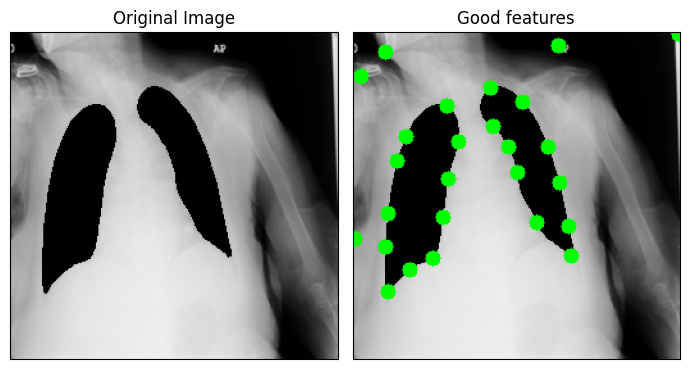

In [10]:
images = get_features(image)
plot_images(images,['Original Image', 'Good features'])

### Using Fast Feautures Detector method (Features from Accelerated Segment Test)

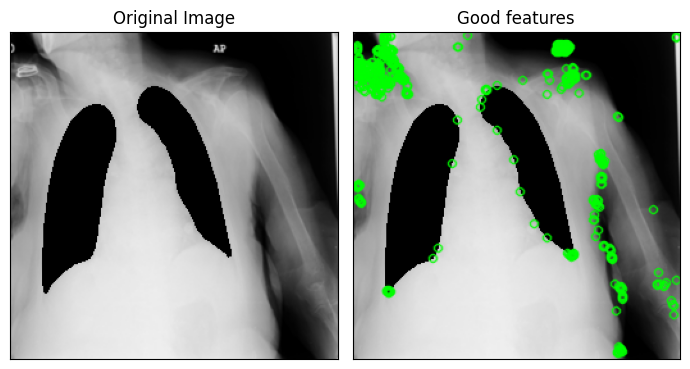

In [11]:
images = get_features(image,'Fast')
plot_images(images,['Original Image', 'Good features'])

### Using ORB method (Oriented FAST and Rotated BRIEF)

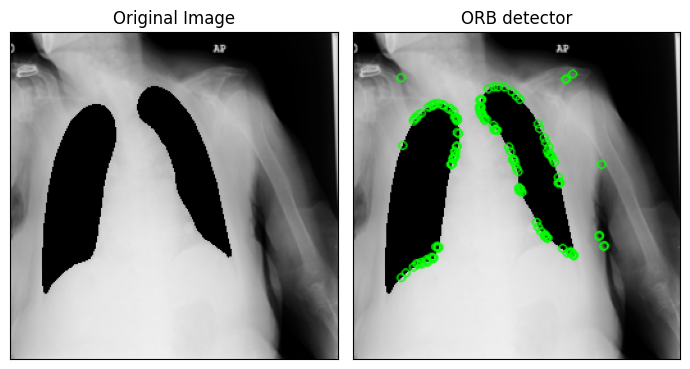

In [12]:
images = get_features(image,'ORB')
plot_images(images,['Original Image', 'ORB detector'])

### Using SIFT method (Scale-Invariant Feature Transform)

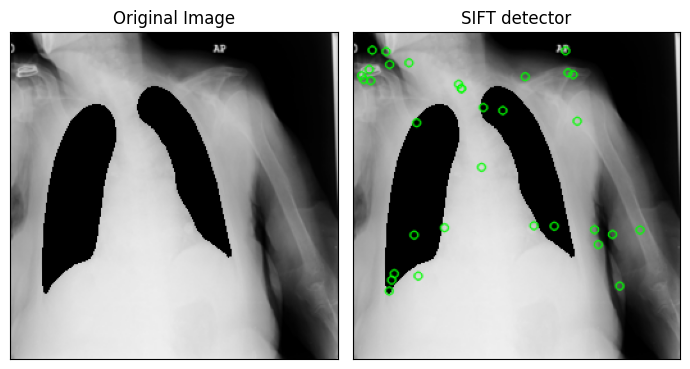

In [13]:
images = get_features(image,'SIFT')
plot_images(images,['Original Image', 'SIFT detector'])

## Draw image outlines

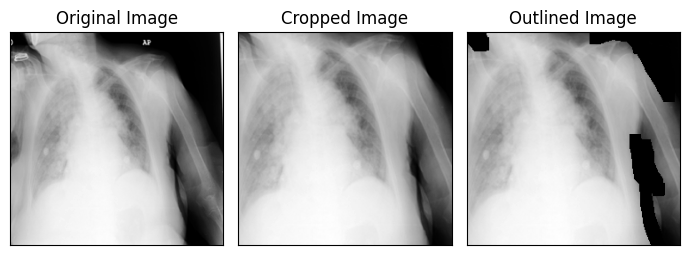

In [14]:
cropped_image, original_image = crop_image(image_path)
outlined_image = add_outline(cropped_image)
sgmnt_image = segment_image(outlined_image, outlined_image)
plot_images([original_image, cropped_image, sgmnt_image], ['Original Image', 'Cropped Image', 'Outlined Image'])

## Get total number of features by method

### Using ORB method

Processing images for: COVID


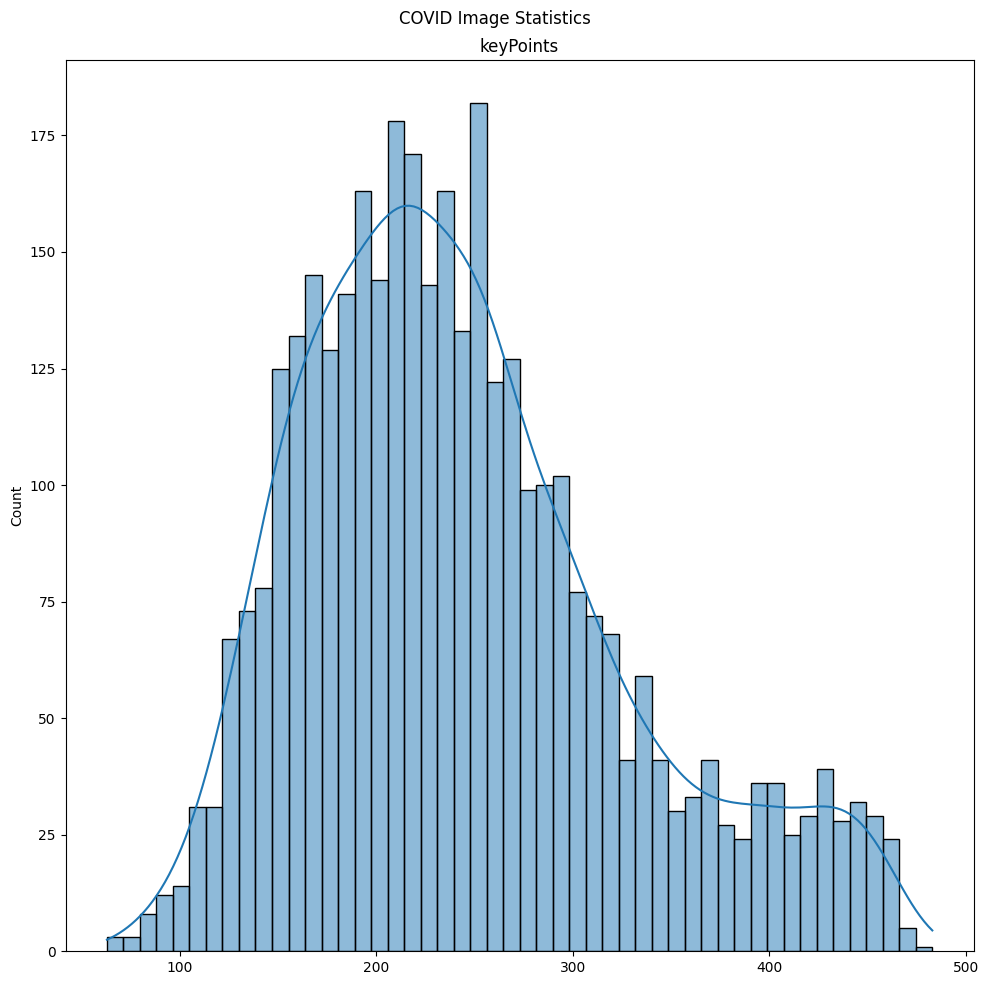

Processing images for: NORMAL


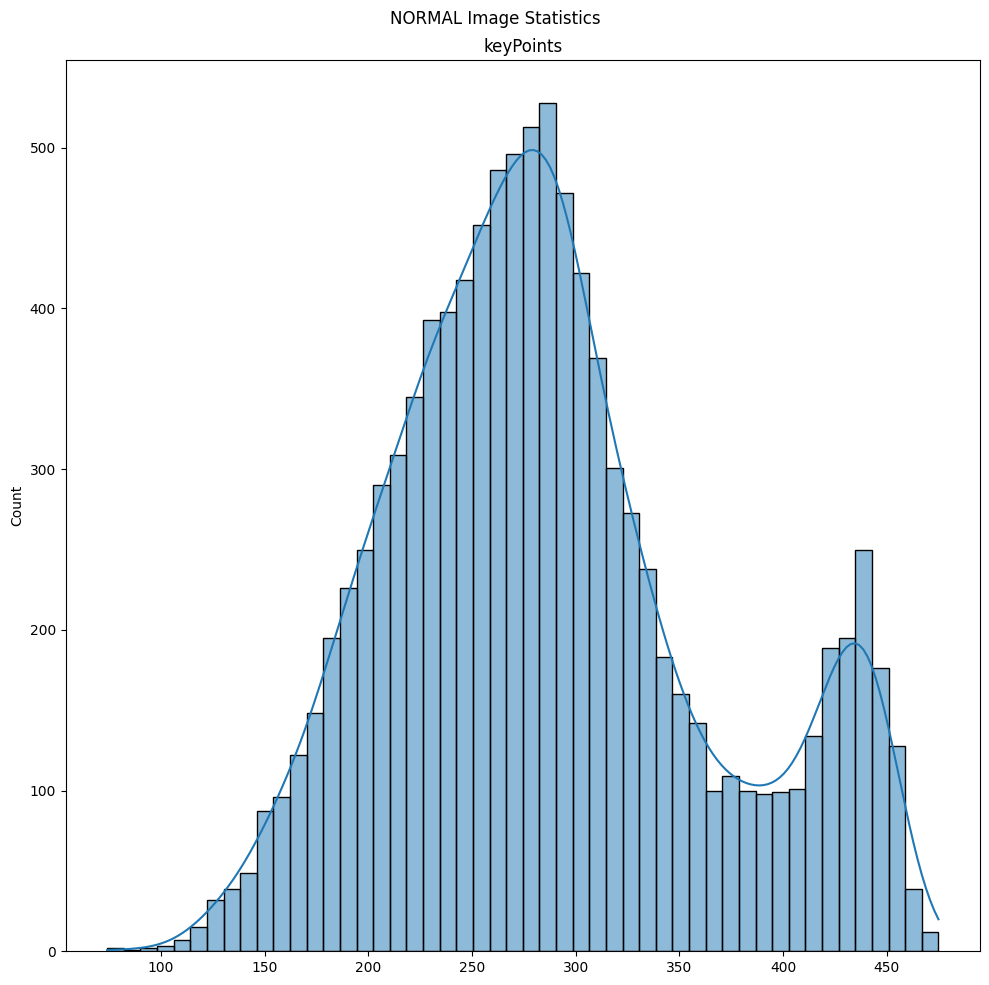

Processing images for: Viral Pneumonia


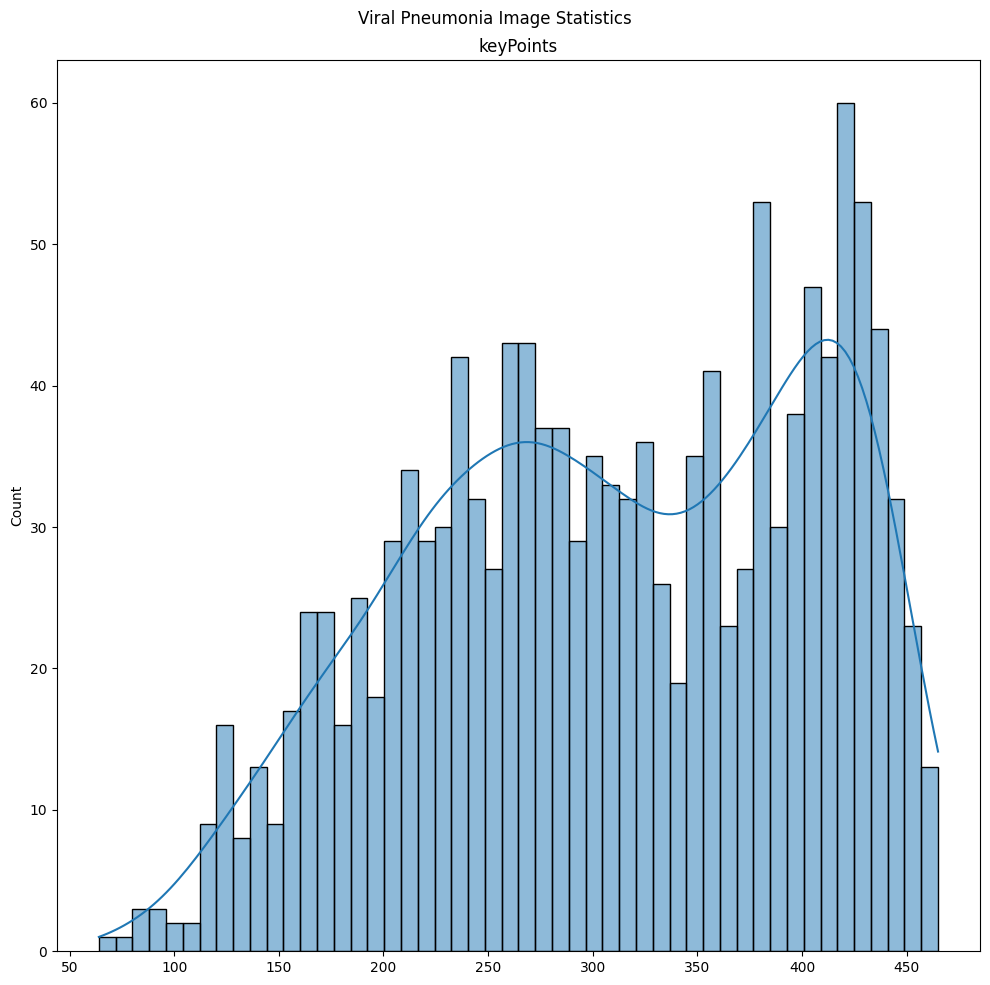

Processing images for: Lung_Opacity


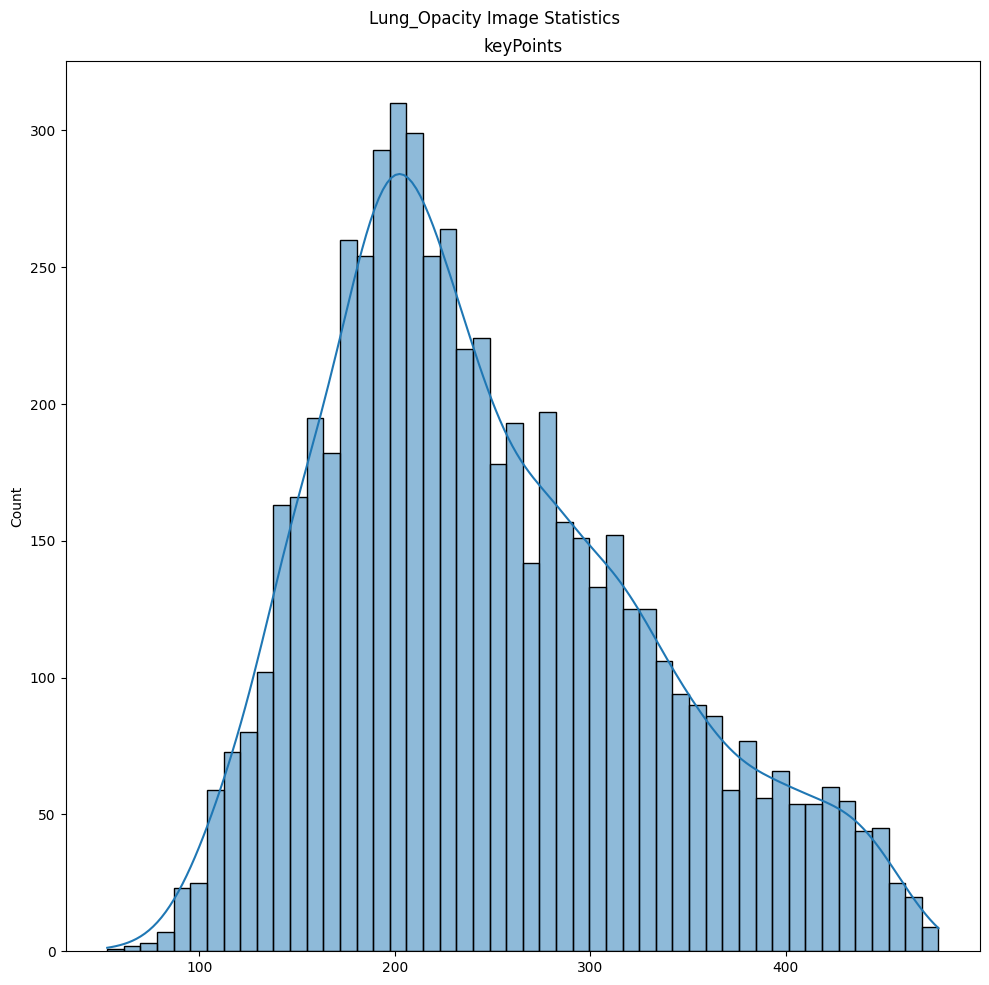

In [15]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_all_images_features(raw_data_dir+i+'/images', raw_data_dir+i+'/masks')
    plot_images_statistics(i,image_stats[2],1)
    del image_stats

### Using SIFT method

Processing images for: COVID


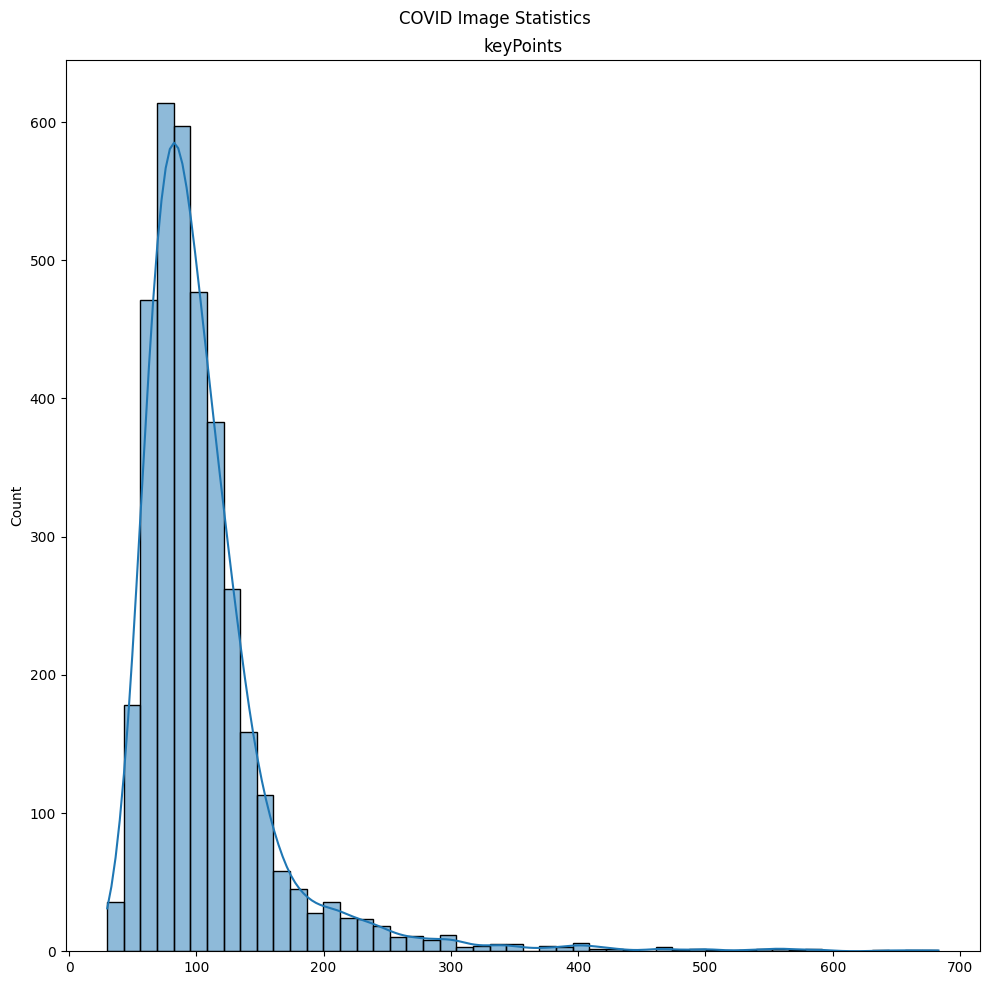

Processing images for: NORMAL


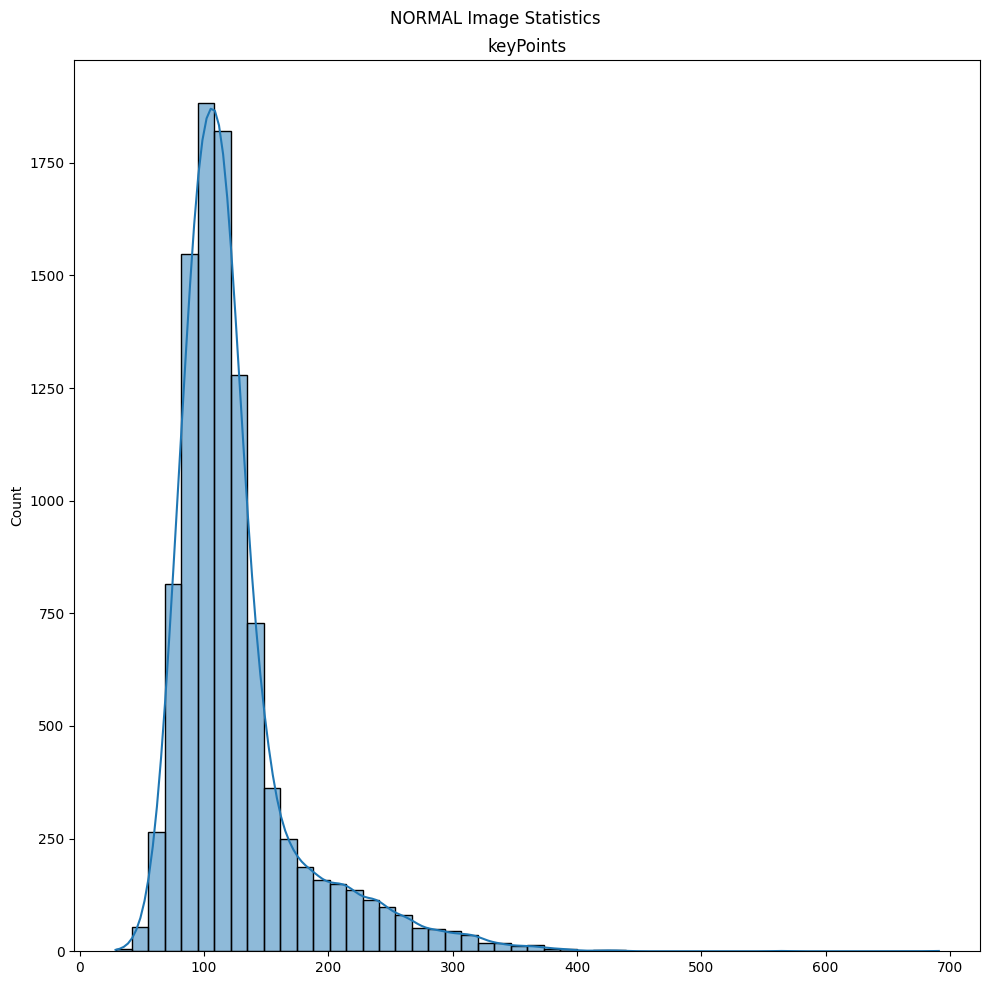

Processing images for: Viral Pneumonia


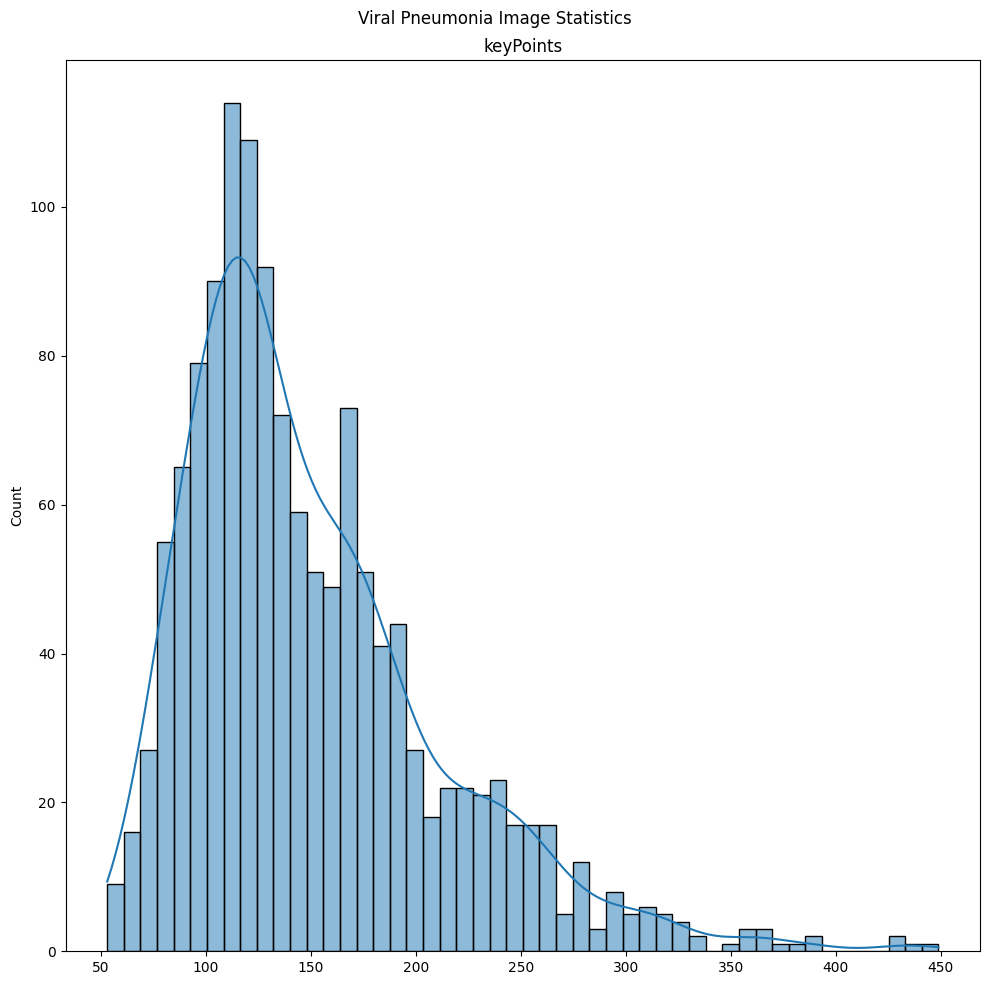

Processing images for: Lung_Opacity


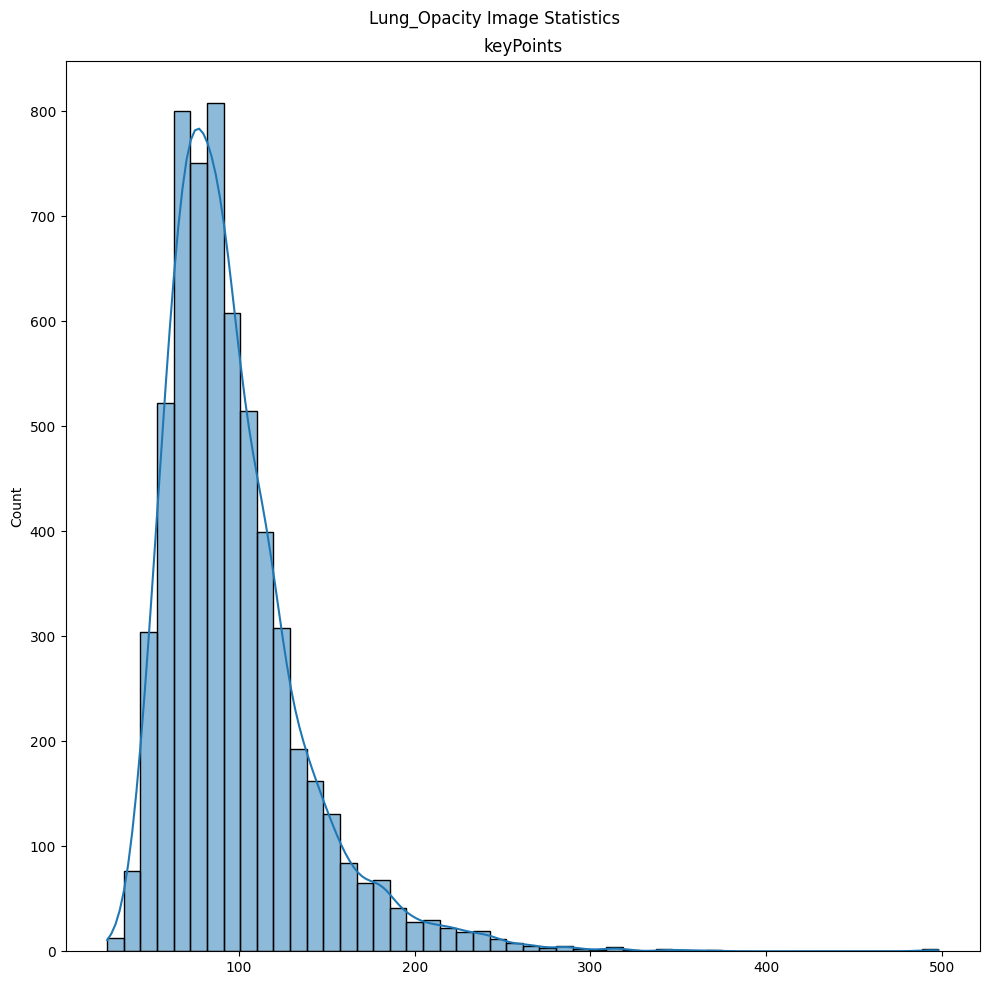

In [16]:
for i in dataset:
    print('Processing images for:',i)
    image_stats = get_all_images_features(raw_data_dir+i+'/images', raw_data_dir+i+'/masks', method='SIFT')
    plot_images_statistics(i,image_stats[2],1)
    del image_stats